In [36]:
# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt

# from math import factorial

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [30]:
train_df = pd.read_csv("./data/train.csv")
train_df.shape

(200000, 288)

In [31]:
test_df = pd.read_csv("./data/test.csv")
test_df.shape

(100000, 287)

In [32]:
elements = [e for e in train_df.columns if e != 'row_id' and e != 'target']

# Convert the 10 bacteria names to the integers 0 .. 9
le = LabelEncoder()
train_df['target_num'] = le.fit_transform(train_df.target)

train_df.shape, test_df.shape

((200000, 289), (100000, 287))

In [33]:
np.unique(train_df.A0T0G2C8)

array([-4.29153442e-05, -4.19153442e-05, -4.09153442e-05, -3.99153442e-05,
       -3.89153442e-05, -3.79153442e-05, -3.69153442e-05, -3.59153442e-05,
       -3.49153442e-05, -3.39153442e-05, -3.29153442e-05, -3.19153442e-05,
       -3.09153442e-05, -2.99153442e-05, -2.89153442e-05, -2.79153442e-05,
       -2.69153442e-05, -2.59153442e-05, -2.49153442e-05, -2.39153442e-05,
       -2.29153442e-05, -2.19153442e-05, -2.09153442e-05, -1.99153442e-05,
       -1.89153442e-05, -1.79153442e-05, -1.69153442e-05, -1.59153442e-05,
       -1.49153442e-05, -1.39153442e-05, -1.29153442e-05, -1.19153442e-05,
       -1.09153442e-05, -9.91534424e-06, -8.91534424e-06, -7.91534424e-06,
       -6.91534424e-06, -5.91534424e-06, -4.91534424e-06, -3.91534424e-06,
       -2.91534424e-06, -1.91534424e-06, -9.15344238e-07,  8.46557617e-08,
        1.08465576e-06,  2.08465576e-06,  3.08465576e-06,  4.08465576e-06,
        5.08465576e-06,  6.08465576e-06,  7.08465576e-06,  8.08465576e-06,
        9.08465576e-06,  

In [34]:
def bias(w, x, y, z) :
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4 **10)
def bias_of(s) :
    w = int(s[1:s.index("T")])
    x = int(s[s.index("T")+1:s.index("G")])
    y = int(s[s.index("G")+1:s.index("C")])
    z = int(s[s.index("C")+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4 **10)

train_i = pd.DataFrame({col: ((train_df[col] + bias_of(col)) * 1000000).round().astype(int)
                        for col in elements})
test_i = pd.DataFrame({col: ((test_df[col] + bias_of(col)) * 1000000).round().astype(int)
                       for col in elements})

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1000,0,1000,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
2,0,8,50,243,468,510,443,239,44,3,...,85,170,91,167,192,115,20,18,29,2
3,1,4,55,359,692,762,596,311,40,3,...,111,237,143,266,288,196,31,25,56,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,10,40,290,550,530,400,320,20,0,...,60,210,100,190,230,70,10,70,30,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
199997,1,11,38,83,181,203,163,99,38,2,...,71,201,174,196,299,137,26,45,31,1
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2000,0,0,0,0,0,0


In [39]:
train_i.sample(10)

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
27219,0,5,56,275,517,603,529,264,51,3,...,72,187,105,210,243,141,23,21,47,2
114786,0,1,0,4,3,5,9,2,0,0,...,230,629,556,606,965,493,72,159,125,6
160414,0,7,53,235,452,501,435,244,46,4,...,73,156,97,163,208,103,18,20,37,2
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1000,0,0,0,0
124524,7,5,0,2,1,0,2,0,0,1,...,625,1516,928,2072,2846,2001,320,439,469,3
93676,0,0,0,0,1000,2000,0,1000,0,0,...,0,0,0,0,0,0,0,0,0,0
106096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,0,0,0,0,0,0
59458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,0,0,0,0,0,0
83113,0,20,30,130,240,340,230,190,10,0,...,130,130,120,240,230,130,10,10,20,0
49248,0,0,0,0,0,0,0,0,0,0,...,10000,0,0,0,0,0,0,0,10000,0


In [40]:
train_i.sum(axis=1).min(), train_i.sum(axis=1).max()

(1000000, 1000000)

In [43]:
train_df['gcd'] = np.gcd.reduce(train_i[elements], axis=1)
test_df['gcd'] = np.gcd.reduce(test_i[elements], axis=1)

np.unique(train_df['gcd'], return_counts=True)
np.unique(test_df['gcd'], return_counts=True)

(array([    1,    10,  1000, 10000]),
 array([25208, 24951, 24930, 24911], dtype=int64))

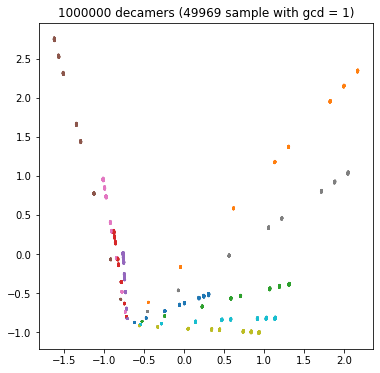

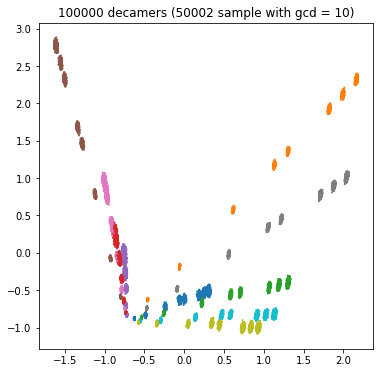

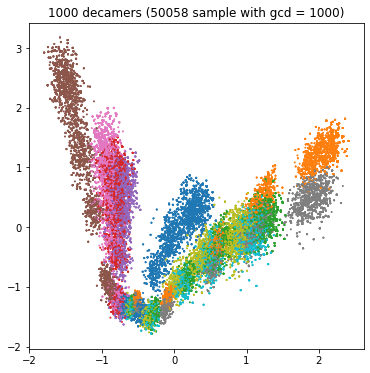

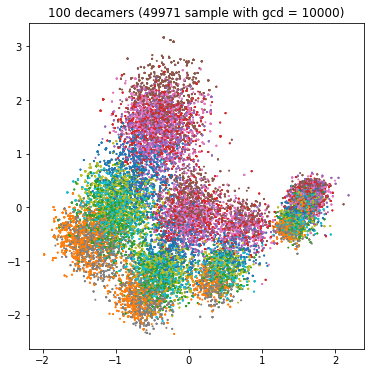

In [48]:
for scale in np.sort(train_df['gcd'].unique()) :
    pca = PCA(whiten=True, random_state=1)
    pca.fit(train_i[elements][train_df['gcd'] == scale])
    
    Xt_train = pca.transform(train_i[elements][train_df['gcd'] == scale])
    Xt_test = pca.transform(test_i[elements][test_df['gcd'] == scale])
    
    plt.figure(figsize=(6,6))
    plt.scatter(Xt_train[:,0], Xt_train[:, 1], c=train_df.target_num[train_df['gcd'] == scale], cmap = 'tab10', s=1)
    plt.title(f"{1000000 // scale} decamers ({(train_df['gcd'] == scale).sum()} sample with gcd = {scale})")
    plt.show()

In [51]:
train_df[elements].duplicated().sum()

76007

In [52]:
test_df[elements].duplicated().sum()

26779

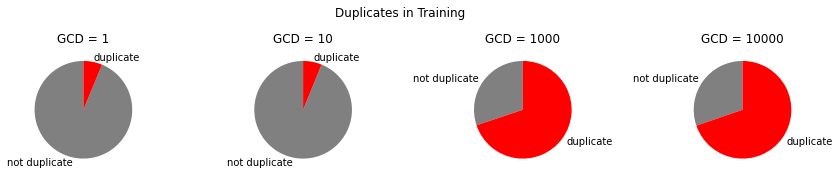

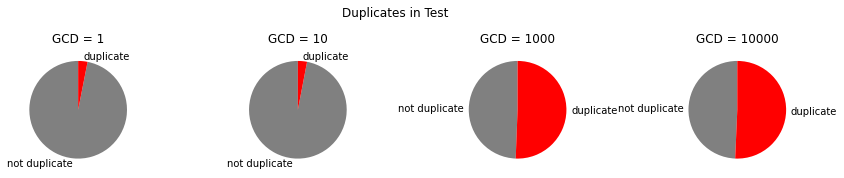

In [54]:
def plot_duplicates_per_gcd(df, title):
    plt.figure(figsize=(14, 3))
    plt.tight_layout()
    for i, gcd in enumerate(np.unique(df.gcd)) :
        plt.subplot(1, 4, i+1)
        duplicates = df[df.gcd == gcd][elements].duplicated().sum()
        non_duplicates = len(df[df.gcd == gcd]) - duplicates
        plt.pie([non_duplicates, duplicates], labels=['not duplicate', 'duplicate'],
               colors = ['gray', 'r'], startangle=90)
        plt.title(f"GCD = {gcd}")
    plt.subplots_adjust(wspace=0.8)
    plt.suptitle(title)
    plt.show()

plot_duplicates_per_gcd(train_df, title="Duplicates in Training")
plot_duplicates_per_gcd(test_df, title="Duplicates in Test")